###  Appling Decision Tree on Telecom Customer Churn Dataset

Audity Ghosh
<br>3rd Year, CSE, RUET

#### Objectives:
- Data Preprocessing
- Feature Encoding 
- Supervised Learning: Decision Tree
- Grid Search and Cross validation
- Plotting Decision Tree
- Prediction result evaluation, confusion matrix and classification report
- AUC curve

#### Source of dataset: 
- dataset: https://github.com/SKawsar/Machine_Learning_With_Python_Batch_2/blob/main/Churn.csv 
- Actual dataset source: https://learn.datacamp.com/courses/marketing-analytics-predicting-customer-churn-in-python

#### Import libraries

In [111]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = None

#### Load the dataset

In [112]:
df = pd.read_csv("Churn.csv")
display(df.head())
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


(3333, 21)


In [113]:
df.isnull().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

There are no null values present in this dataset

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   object 
 8   Intl_Plan       3333 non-null   object 
 9   Vmail_Plan      3333 non-null   object 
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

There are 20 features and 1 target variable called Churn, Four features are categorical ( Intl_Plan, Vmail_Plan, State, Phone ) and Churn itself is seemed to be categorical. We need to fix that first

In [115]:
df.describe()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,8.099010,179.775098,200.980348,200.872037,10.237294,1.562856,100.435644,30.562307,100.114311,17.083540,100.107711,9.039325,4.479448,2.764581,437.182418
std,39.822106,13.688365,54.467389,50.713844,50.573847,2.791840,1.315491,20.069084,9.259435,19.922625,4.310668,19.568609,2.275873,2.461214,0.753773,42.371290
min,1.000000,0.000000,0.000000,0.000000,23.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,33.000000,1.040000,0.000000,0.000000,408.000000
25%,74.000000,0.000000,143.700000,166.600000,167.000000,8.500000,1.000000,87.000000,24.430000,87.000000,14.160000,87.000000,7.520000,3.000000,2.300000,408.000000
50%,101.000000,0.000000,179.400000,201.400000,201.200000,10.300000,1.000000,101.000000,30.500000,100.000000,17.120000,100.000000,9.050000,4.000000,2.780000,415.000000
75%,127.000000,20.000000,216.400000,235.300000,235.300000,12.100000,2.000000,114.000000,36.790000,114.000000,20.000000,113.000000,10.590000,6.000000,3.270000,510.000000
max,243.000000,51.000000,350.800000,363.700000,395.000000,20.000000,9.000000,165.000000,59.640000,170.000000,30.910000,175.000000,17.770000,20.000000,5.400000,510.000000


### Data Preprocessing

In [116]:
print(df['Churn'].unique())
print(df['Intl_Plan'].unique())
print(df['Vmail_Plan'].unique())

['no' 'yes']
['no' 'yes']
['yes' 'no']


###### So the categorical variables ( Churn, Intl_Plan, Vmail_Plan) have only yes-no values. It is better to convert them into 1-0 just like Label Encoder for two labels. Then State, Area_Code and Phone is not important for predicting the Churn variable. So we dropped them. 

In [117]:
df = df.drop(['State', 'Area_Code', 'Phone'], axis=1)

df['Churn'] = df['Churn'].replace(({'no':0, 'yes':1}))
df['Intl_Plan'] = df['Intl_Plan'].replace(({'no':0, 'yes':1}))
df['Vmail_Plan'] = df['Vmail_Plan'].replace(({'no':0, 'yes':1}))

display(df.head(10))
print(df.shape)

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,128,25,265.1,197.4,244.7,10.0,1,0,0,1,110,45.07,99,16.78,91,11.01,3,2.70
1,107,26,161.6,195.5,254.4,13.7,1,0,0,1,123,27.47,103,16.62,103,11.45,3,3.70
2,137,0,243.4,121.2,162.6,12.2,0,0,0,0,114,41.38,110,10.30,104,7.32,5,3.29
3,84,0,299.4,61.9,196.9,6.6,2,0,1,0,71,50.90,88,5.26,89,8.86,7,1.78
4,75,0,166.7,148.3,186.9,10.1,3,0,1,0,113,28.34,122,12.61,121,8.41,3,2.73
5,118,0,223.4,220.6,203.9,6.3,0,0,1,0,98,37.98,101,18.75,118,9.18,6,1.70
6,121,24,218.2,348.5,212.6,7.5,3,0,0,1,88,37.09,108,29.62,118,9.57,7,2.03
7,147,0,157.0,103.1,211.8,7.1,0,0,1,0,79,26.69,94,8.76,96,9.53,6,1.92
8,117,0,184.5,351.6,215.8,8.7,1,0,0,0,97,31.37,80,29.89,90,9.71,4,2.35
9,141,37,258.6,222.0,326.4,11.2,0,0,1,1,84,43.96,111,18.87,97,14.69,5,3.02


(3333, 18)


In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account_Length  3333 non-null   int64  
 1   Vmail_Message   3333 non-null   int64  
 2   Day_Mins        3333 non-null   float64
 3   Eve_Mins        3333 non-null   float64
 4   Night_Mins      3333 non-null   float64
 5   Intl_Mins       3333 non-null   float64
 6   CustServ_Calls  3333 non-null   int64  
 7   Churn           3333 non-null   int64  
 8   Intl_Plan       3333 non-null   int64  
 9   Vmail_Plan      3333 non-null   int64  
 10  Day_Calls       3333 non-null   int64  
 11  Day_Charge      3333 non-null   float64
 12  Eve_Calls       3333 non-null   int64  
 13  Eve_Charge      3333 non-null   float64
 14  Night_Calls     3333 non-null   int64  
 15  Night_Charge    3333 non-null   float64
 16  Intl_Calls      3333 non-null   int64  
 17  Intl_Charge     3333 non-null   f

In [119]:
df['Churn'].value_counts()

0    2850
1     483
Name: Churn, dtype: int64

There are some imbalance in the target column. It would be better to use balancing techniques. 

In [120]:
X = df.drop('Churn', axis=1)
y = df['Churn']

print(X.shape, y.shape)

(3333, 17) (3333,)


#### Splitting the dataset into features and target.

In [121]:
features = X.columns
features

Index(['Account_Length', 'Vmail_Message', 'Day_Mins', 'Eve_Mins', 'Night_Mins',
       'Intl_Mins', 'CustServ_Calls', 'Intl_Plan', 'Vmail_Plan', 'Day_Calls',
       'Day_Charge', 'Eve_Calls', 'Eve_Charge', 'Night_Calls', 'Night_Charge',
       'Intl_Calls', 'Intl_Charge'],
      dtype='object')

#### Splitting the dataset into train and test set with 80-20 ratio and fixed random_state. 

In [122]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42, 
                                                    stratify=y)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2666, 17) (667, 17) (2666,) (667,)


### Standard Scaler

Before using classifier, we applied Standard Scaler to scale the features. The concept of standardization comes into picture when continuous independent variables are measured at different scales. It means these variables do not give equal contribution to the analysis. The idea is to rescale an original variable to have equal range and/or variance.
Decision trees and ensemble methods do not require feature scaling to be performed as they are not sensitive to the the variance in the data. 

In [123]:
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X.to_numpy())
X = pd.DataFrame(X, columns=features)
 

X.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge
0,0.676489,1.234883,1.566767,-0.070610,0.866743,-0.085008,-0.427932,-0.327580,1.617086,0.476643,1.567036,-0.055940,-0.070427,-0.465494,0.866029,-0.601195,-0.085690
1,0.149065,1.307948,-0.333738,-0.108080,1.058571,1.240482,-0.427932,-0.327580,1.617086,1.124503,-0.334013,0.144867,-0.107549,0.147825,1.059390,-0.601195,1.241169
2,0.902529,-0.591760,1.168304,-1.573383,-0.756869,0.703121,-1.188218,-0.327580,-0.618396,0.675985,1.168464,0.496279,-1.573900,0.198935,-0.755571,0.211534,0.697156
3,-0.428590,-0.591760,2.196596,-2.742865,-0.078551,-1.303026,0.332354,3.052685,-0.618396,-1.466936,2.196759,-0.608159,-2.743268,-0.567714,-0.078806,1.024263,-1.306401
4,-0.654629,-0.591760,-0.240090,-1.038932,-0.276311,-0.049184,1.092641,3.052685,-0.618396,0.626149,-0.240041,1.098699,-1.037939,1.067803,-0.276562,-0.601195,-0.045885


### Decision Tree classifier, no grid search and corresponding tree diagram with max_depth=3

In [124]:
model_DT = DecisionTreeClassifier()
# model_DT = LogisticRegression()
model_DT = model_DT.fit(X_train, y_train)

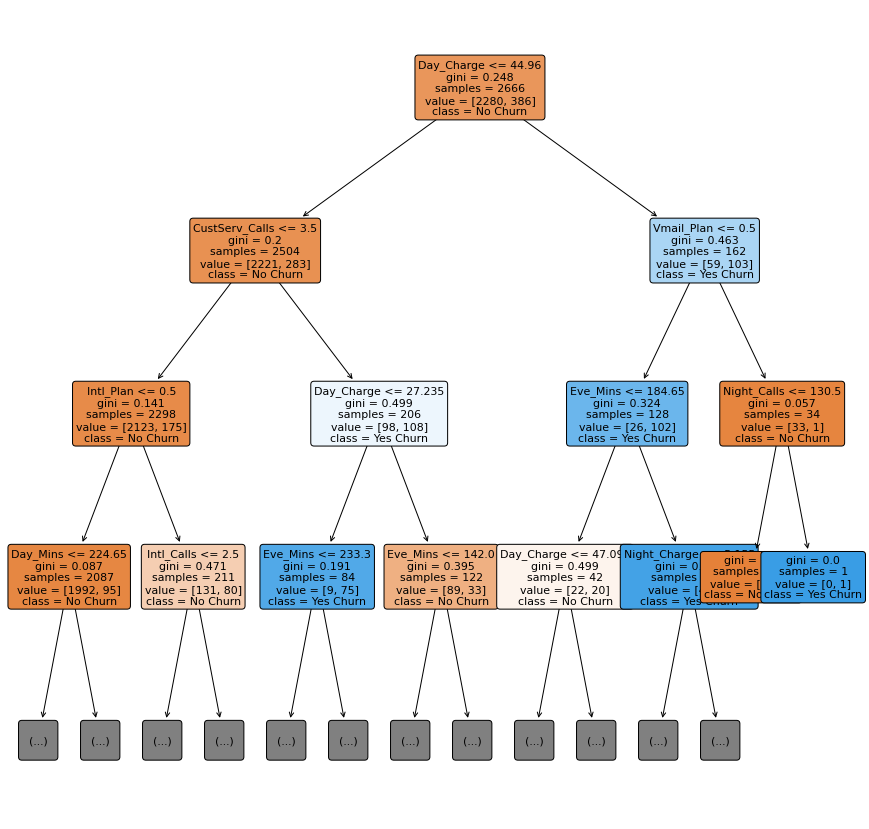

In [125]:
plt.figure(figsize = (15, 15))
plot_tree(model_DT, 
          filled=True,
           rounded=True,
           class_names = ["No Churn", "Yes Churn"],
           feature_names = X.columns,
           max_depth=3, 
           fontsize=11)

plt.show()

### Grid Search and cross-validation with Decision Tree classifier

In [126]:
parameters = {'criterion': ['gini','entropy'],
              'max_depth': [3, 4, 5, 6, 7, None],
              'max_features': ["auto"]}

model = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(estimator=model,
                           param_grid=parameters,
                           scoring="recall",
                           cv=5,
                           n_jobs=-1)

# fit the model with the best hyper-parameters
grid_result = grid_search.fit(X_train, y_train)

In [127]:
y_pred = grid_result.predict(X_test)

In [128]:
grid_result.best_params_

{'criterion': 'gini', 'max_depth': None, 'max_features': 'auto'}

In [129]:
cv_result = pd.DataFrame(grid_result.cv_results_)
cv_result = cv_result[['param_criterion', 'param_max_depth',
                       'split0_test_score',
                       'split1_test_score', 'split2_test_score', 'split3_test_score',
                       'split4_test_score', 'mean_test_score', 'std_test_score',
                       'rank_test_score']]
cv_result = cv_result.sort_values(by='rank_test_score')
display(cv_result)
print(cv_result.columns)

,param_criterion,param_max_depth,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
5,gini,None,0.641026,0.662338,0.636364,0.675325,0.636364,0.650283,0.015784,1
11,entropy,None,0.641026,0.662338,0.766234,0.441558,0.584416,0.619114,0.106511,2
10,entropy,7,0.474359,0.558442,0.753247,0.480519,0.558442,0.565002,0.100872,3
4,gini,7,0.500000,0.597403,0.571429,0.402597,0.428571,0.500000,0.076392,4
3,gini,6,0.384615,0.480519,0.428571,0.506494,0.441558,0.448352,0.042225,5
9,entropy,6,0.410256,0.571429,0.389610,0.428571,0.428571,0.445688,0.064493,6
8,entropy,5,0.461538,0.571429,0.194805,0.506494,0.493506,0.445554,0.130375,7
2,gini,5,0.397436,0.441558,0.311688,0.324675,0.363636,0.367799,0.047632,8
7,entropy,4,0.294872,0.376623,0.298701,0.246753,0.298701,0.303130,0.041682,9
1,gini,4,0.346154,0.233766,0.337662,0.311688,0.233766,0.292607,0.049368,10


Index(['param_criterion', 'param_max_depth', 'split0_test_score',
       'split1_test_score', 'split2_test_score', 'split3_test_score',
       'split4_test_score', 'mean_test_score', 'std_test_score',
       'rank_test_score'],
      dtype='object')


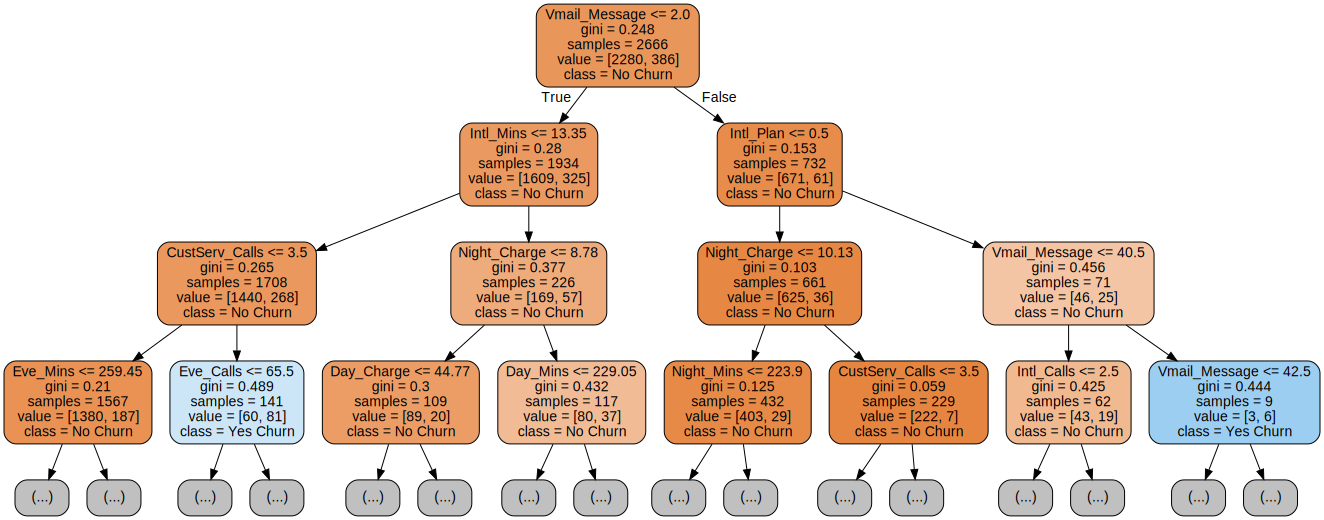

In [130]:
#plotting : decision tree with GRIDSEARCHCV 
from sklearn.tree import export_graphviz
import graphviz


feature_names = X.columns



dot_data = export_graphviz(grid_search.best_estimator_, out_file=None, 
            filled=True, rounded=True, feature_names=feature_names, class_names=['No Churn','Yes Churn'],max_depth=3)

graph = graphviz.Source(dot_data) 

graph

c:\users\user\appdata\local\programs\python\python39\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


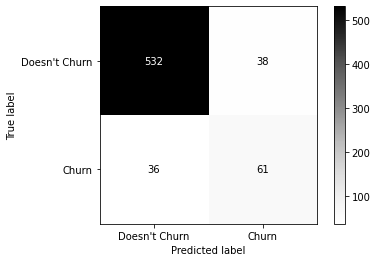

In [131]:
plot_confusion_matrix(grid_result, 
                      X_test, 
                      y_test, 
                      display_labels=["Doesn't Churn", "Churn"],
                      cmap='Greys')
plt.show()

Here, those does not churn in real, 532 of them were correctly identified by our model. Those customers who actually churned, only 61 of them were identified by our model. 

In [132]:
confusion_matrix_dt = confusion_matrix(y_test, y_pred)
print('confusion_matrix: \n', confusion_matrix_dt)

print('Accuracy: ', accuracy_score(y_test, y_pred))


print(classification_report(y_test, y_pred))

confusion_matrix: 
 [[532  38]
 [ 36  61]]
Accuracy:  0.889055472263868
              precision    recall  f1-score   support

           0       0.94      0.93      0.93       570
           1       0.62      0.63      0.62        97

    accuracy                           0.89       667
   macro avg       0.78      0.78      0.78       667
weighted avg       0.89      0.89      0.89       667



#### Interpreting the classification report


TP = The customers who actually churned, and model predicted correctly.<br>
TN = The customers who actually did not churn, and model predicted correctly.<br>
FP = The customers who actually did not churn, but the model says they churned.<br>
FN = The customers who actually churned, but the model says they did not churn.<br>

Accuracy = (TP+TN) / (TP+TN+FP+FN)<br>
Here, the model's accuracy is 88.9%. Which means it can predict 88.9% customers correctly. 

Precision = TP/TP+FP<br>
Precision: Out of all the customers that the model predicted would churn, only 62% actually did.

Recall = TP / (TP + FN)<br>
Recall: Out of all the customers that actually did churn, the model only predicted this outcome correctly for 63% of those customers.

F1 Score: This value is calculated as:<br>
F1 Score: 2 * (Precision * Recall) / (Precision + Recall)<br>
F1 Score: 2 * (.62 * .63) / (.62 + .63)<br>
F1 Score: 0.62.<br>
Since this value isn’t very close to 1, it tells us that the model does an average job of predicting whether or not customers will churn.



#### ROC-AUC Curve

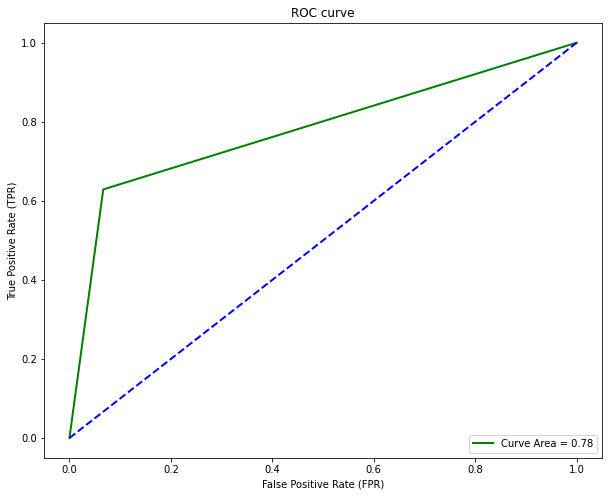

In [133]:
fpr, tpr, thr = roc_curve(y_test, grid_result.predict_proba(X_test)[:,1])
auc = np.round(roc_auc_score(y_test, y_pred), 2)

plt.figure(figsize=(10, 8))
plt.plot(fpr, 
         tpr, 
         color='green', 
         lw=2, 
         label="Curve Area = " +str(auc))

plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC curve')
plt.legend(loc="lower right")
plt.show()

Classifiers that give curves closer to the top-left corner indicate a better performance. Here, we can say curve is close to top-left corner, but not that much. So the model provides an average performance. 